In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import itertools
from scipy.spatial import Delaunay

In [7]:
def pentagrid_intersections(npoints=5, radius=10):
    """
    Generates the intersections of a pentagrid used for Penrose tiling.
    """
    golden_ratio = (1 + np.sqrt(5)) / 2
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / npoints)
    points = []

    for angle in angles:
        for k in range(-radius, radius):
            points.append((np.cos(angle) * k, np.sin(angle) * k))
            points.append((np.cos(angle + np.pi) * k, np.sin(angle + np.pi) * k))

    return np.array(points)

def get_vertices_and_adjacency_matrix(tri):
    """
    Extracts vertices and adjacency matrix from the Delaunay triangulation.
    """
    vertices = tri.points
    edges = set()
    for simplex in tri.simplices:
        for i, j in zip(simplex, np.roll(simplex, 1)):
            edges.add(tuple(sorted((i, j))))

    adjacency_matrix = np.zeros((len(vertices), len(vertices)))
    for i, j in edges:
        adjacency_matrix[i, j] = 1
        adjacency_matrix[j, i] = 1

    return vertices, adjacency_matrix

# Generate points and compute Delaunay triangulation
points = pentagrid_intersections()
tri = Delaunay(points)

# Get vertices and adjacency matrix
vertices, adjacency_matrix = get_vertices_and_adjacency_matrix(tri)


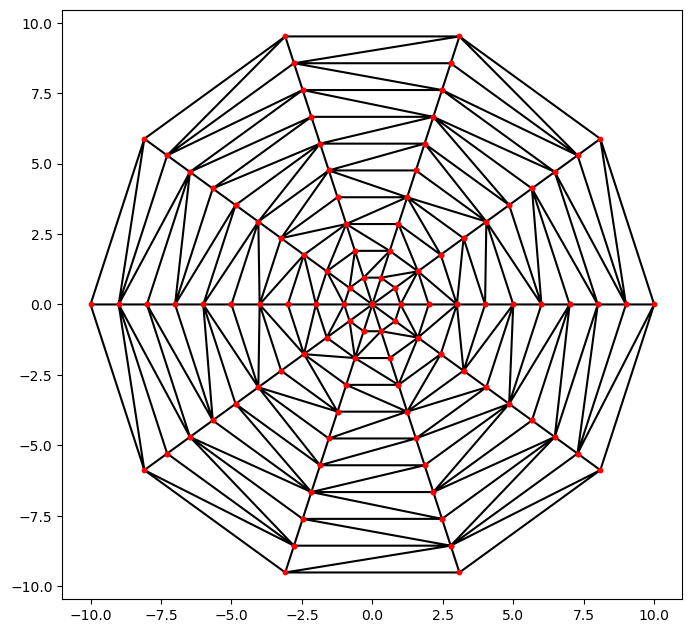

In [8]:
# Optional: Visualize the tiling
plt.figure(figsize=(8, 8))
plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy(), color='black')

plt.scatter(vertices[:, 0], vertices[:, 1], color='red', s=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()